In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency, normaltest

In [18]:
df = pd.read_csv("./data/car_price_prediction.csv")
print(df.head())
print(df.info())

         ID  Price  Levy Manufacturer    Model  Prod. year   Category  \
0  45654403  13328  1399        LEXUS   RX 450        2010       Jeep   
1  44731507  16621  1018    CHEVROLET  Equinox        2011       Jeep   
2  45774419   8467     -        HONDA      FIT        2006  Hatchback   
3  45769185   3607   862         FORD   Escape        2011       Jeep   
4  45809263  11726   446        HONDA      FIT        2014  Hatchback   

  Leather interior Fuel type Engine volume    Mileage  Cylinders  \
0              Yes    Hybrid           3.5  186005 km       6.00   
1               No    Petrol             3  192000 km       6.00   
2               No    Petrol           1.3  200000 km       4.00   
3              Yes    Hybrid           2.5  168966 km       4.00   
4              Yes    Petrol           1.3   91901 km       4.00   

  Gear box type Drive wheels   Doors             Wheel   Color  Airbags  
0     Automatic          4x4  04-May        Left wheel  Silver       12  
1   

In [19]:
df.columns = [col.strip().replace(' ', '_').replace('.', '').lower() for col in df.columns]
print(df.head())
print(df.info())


         id  price  levy manufacturer    model  prod_year   category  \
0  45654403  13328  1399        LEXUS   RX 450       2010       Jeep   
1  44731507  16621  1018    CHEVROLET  Equinox       2011       Jeep   
2  45774419   8467     -        HONDA      FIT       2006  Hatchback   
3  45769185   3607   862         FORD   Escape       2011       Jeep   
4  45809263  11726   446        HONDA      FIT       2014  Hatchback   

  leather_interior fuel_type engine_volume    mileage  cylinders  \
0              Yes    Hybrid           3.5  186005 km       6.00   
1               No    Petrol             3  192000 km       6.00   
2               No    Petrol           1.3  200000 km       4.00   
3              Yes    Hybrid           2.5  168966 km       4.00   
4              Yes    Petrol           1.3   91901 km       4.00   

  gear_box_type drive_wheels   doors             wheel   color  airbags  
0     Automatic          4x4  04-May        Left wheel  Silver       12  
1     Tipt

In [20]:
print(df.isnull().sum())
print(df['leather_interior'].unique())

id                  0
price               0
levy                0
manufacturer        0
model               0
prod_year           0
category            0
leather_interior    0
fuel_type           0
engine_volume       0
mileage             0
cylinders           0
gear_box_type       0
drive_wheels        0
doors               0
wheel               0
color               0
airbags             0
dtype: int64
['Yes' 'No']


In [21]:
print(df.columns.tolist())
# df = df.drop(['id'], axis=1)
print(df.head())


['id', 'price', 'levy', 'manufacturer', 'model', 'prod_year', 'category', 'leather_interior', 'fuel_type', 'engine_volume', 'mileage', 'cylinders', 'gear_box_type', 'drive_wheels', 'doors', 'wheel', 'color', 'airbags']
         id  price  levy manufacturer    model  prod_year   category  \
0  45654403  13328  1399        LEXUS   RX 450       2010       Jeep   
1  44731507  16621  1018    CHEVROLET  Equinox       2011       Jeep   
2  45774419   8467     -        HONDA      FIT       2006  Hatchback   
3  45769185   3607   862         FORD   Escape       2011       Jeep   
4  45809263  11726   446        HONDA      FIT       2014  Hatchback   

  leather_interior fuel_type engine_volume    mileage  cylinders  \
0              Yes    Hybrid           3.5  186005 km       6.00   
1               No    Petrol             3  192000 km       6.00   
2               No    Petrol           1.3  200000 km       4.00   
3              Yes    Hybrid           2.5  168966 km       4.00   
4       

In [22]:
print(df['leather_interior'].unique())
df['leather_interior'] = df['leather_interior'].map({'Yes': 1, 'No': 0})
print(df.head())
print(df['leather_interior'].unique())

['Yes' 'No']
         id  price  levy manufacturer    model  prod_year   category  \
0  45654403  13328  1399        LEXUS   RX 450       2010       Jeep   
1  44731507  16621  1018    CHEVROLET  Equinox       2011       Jeep   
2  45774419   8467     -        HONDA      FIT       2006  Hatchback   
3  45769185   3607   862         FORD   Escape       2011       Jeep   
4  45809263  11726   446        HONDA      FIT       2014  Hatchback   

   leather_interior fuel_type engine_volume    mileage  cylinders  \
0                 1    Hybrid           3.5  186005 km       6.00   
1                 0    Petrol             3  192000 km       6.00   
2                 0    Petrol           1.3  200000 km       4.00   
3                 1    Hybrid           2.5  168966 km       4.00   
4                 1    Petrol           1.3   91901 km       4.00   

  gear_box_type drive_wheels   doors             wheel   color  airbags  
0     Automatic          4x4  04-May        Left wheel  Silver   

In [23]:
df['levy'] = df['levy'].replace('-', np.nan)
df['levy'] = df['levy'].str.replace(',', '').astype(float)
df['mileage'] = df['mileage'].astype(str).str.replace(' km', '', regex=False).str.replace(',', '', regex=False).astype(int)
df['engine_volume'] = df['engine_volume'].astype(str).str.extract(r'(\d+\.\d+|\d+)').astype(float)
print(df.head())

         id  price    levy manufacturer    model  prod_year   category  \
0  45654403  13328 1399.00        LEXUS   RX 450       2010       Jeep   
1  44731507  16621 1018.00    CHEVROLET  Equinox       2011       Jeep   
2  45774419   8467     NaN        HONDA      FIT       2006  Hatchback   
3  45769185   3607  862.00         FORD   Escape       2011       Jeep   
4  45809263  11726  446.00        HONDA      FIT       2014  Hatchback   

   leather_interior fuel_type  engine_volume  mileage  cylinders  \
0                 1    Hybrid           3.50   186005       6.00   
1                 0    Petrol           3.00   192000       6.00   
2                 0    Petrol           1.30   200000       4.00   
3                 1    Hybrid           2.50   168966       4.00   
4                 1    Petrol           1.30    91901       4.00   

  gear_box_type drive_wheels   doors             wheel   color  airbags  
0     Automatic          4x4  04-May        Left wheel  Silver       12 

In [24]:
#zmiana zmiennych tekstowych
cat_cols = df.select_dtypes(include='object').columns
label_encoders = {}
print(cat_cols)

Index(['manufacturer', 'model', 'category', 'fuel_type', 'gear_box_type',
       'drive_wheels', 'doors', 'wheel', 'color'],
      dtype='object')


In [25]:
print(df.head())
print(df.info())

         id  price    levy manufacturer    model  prod_year   category  \
0  45654403  13328 1399.00        LEXUS   RX 450       2010       Jeep   
1  44731507  16621 1018.00    CHEVROLET  Equinox       2011       Jeep   
2  45774419   8467     NaN        HONDA      FIT       2006  Hatchback   
3  45769185   3607  862.00         FORD   Escape       2011       Jeep   
4  45809263  11726  446.00        HONDA      FIT       2014  Hatchback   

   leather_interior fuel_type  engine_volume  mileage  cylinders  \
0                 1    Hybrid           3.50   186005       6.00   
1                 0    Petrol           3.00   192000       6.00   
2                 0    Petrol           1.30   200000       4.00   
3                 1    Hybrid           2.50   168966       4.00   
4                 1    Petrol           1.30    91901       4.00   

  gear_box_type drive_wheels   doors             wheel   color  airbags  
0     Automatic          4x4  04-May        Left wheel  Silver       12 

Statystyki opisowe dla zmiennych ilościowych

In [26]:
quantitative_cols = ['price', 'levy', 'engine_volume', 'mileage', 'cylinders', 'airbags']

valid_quant_cols = [col for col in quantitative_cols if df[col].notna().any()]

df_stats = df[valid_quant_cols].describe().T

df_stats['mode'] = [
    df[col].mode().iloc[0] if not df[col].mode().empty else np.nan
    for col in df_stats.index
]

df_stats = df_stats.rename(columns={
    'count': 'liczba',
    'mean': 'średnia',
    'std': 'odchylenie_std',
    'min': 'minimum',
    '25%': 'Q1',
    '50%': 'mediana',
    '75%': 'Q3',
    'max': 'maksimum'
})

df_stats['wariancja'] = df[df_stats.index].var()

pd.set_option('display.float_format', lambda x: '%.2f' % x)
print(df_stats[['liczba', 'średnia', 'mediana', 'mode', 'minimum', 'maksimum', 'odchylenie_std', 'wariancja']])

                liczba    średnia   mediana     mode  minimum      maksimum  \
price         19237.00   18555.93  13172.00 15681.00     1.00   26307500.00   
levy          13418.00     906.84    781.00   765.00    87.00      11714.00   
engine_volume 19237.00       2.31      2.00     2.00     0.00         20.00   
mileage       19237.00 1532235.69 126000.00     0.00     0.00 2147483647.00   
cylinders     19237.00       4.58      4.00     4.00     1.00         16.00   
airbags       19237.00       6.58      6.00     4.00     0.00         16.00   

               odchylenie_std           wariancja  
price               190581.27      36321220354.37  
levy                   461.87           213321.17  
engine_volume            0.88                0.77  
mileage           48403869.38 2342934570887396.00  
cylinders                1.20                1.44  
airbags                  4.32               18.66  


In [27]:
print(df['leather_interior'].value_counts())

leather_interior
1    13954
0     5283
Name: count, dtype: int64


Tabela liczności dla zmiennych jakościowych + określenie zmiennej zależnej

In [28]:
#Zmienna zależna
target_col = 'price'

qualitative_cols = df.select_dtypes(include='object').columns.tolist()
for col in qualitative_cols:
    print(f"\nLiczność dla zmiennej: {col}")
    print(df[col].value_counts())
    print("-" * 40)


Liczność dla zmiennej: manufacturer
manufacturer
HYUNDAI          3769
TOYOTA           3662
MERCEDES-BENZ    2076
FORD             1111
CHEVROLET        1069
                 ... 
LAMBORGHINI         1
PONTIAC             1
SATURN              1
ASTON MARTIN        1
GREATWALL           1
Name: count, Length: 65, dtype: int64
----------------------------------------

Liczność dla zmiennej: model
model
Prius              1083
Sonata             1079
Camry               938
Elantra             922
E 350               542
                   ... 
530 i                 1
E 500 AVG             1
Vito Extralong        1
C 240 W 203           1
Vito Exstralong       1
Name: count, Length: 1590, dtype: int64
----------------------------------------

Liczność dla zmiennej: category
category
Sedan          8736
Jeep           5473
Hatchback      2847
Minivan         647
Coupe           532
Universal       364
Microbus        306
Goods wagon     233
Pickup           52
Cabriolet        36
Limous

Tabela wielodzielcza

In [29]:
pivot = pd.crosstab(df['category'], df['fuel_type'])
print("\nTabela wielodzielcza: category vs fuel_type")
print(pivot)


Tabela wielodzielcza: category vs fuel_type
fuel_type    CNG  Diesel  Hybrid  Hydrogen  LPG  Petrol  Plug-in Hybrid
category                                                               
Cabriolet      0       1       0         0    0      35               0
Coupe          7      32      11         0    3     479               0
Goods wagon   17     165       0         0    3      48               0
Hatchback     41      79    1309         0   39    1331              48
Jeep         144    2034     588         0   83    2622               2
Limousine      1       0       0         0    0      10               0
Microbus       5     290       0         0    1      10               0
Minivan       49     381      11         0   40     165               1
Pickup         0      27       0         0    2      23               0
Sedan        203     844    1618         1  706    5329              35
Universal     27     183      41         0   15      98               0


Histogramy skategoryzowane

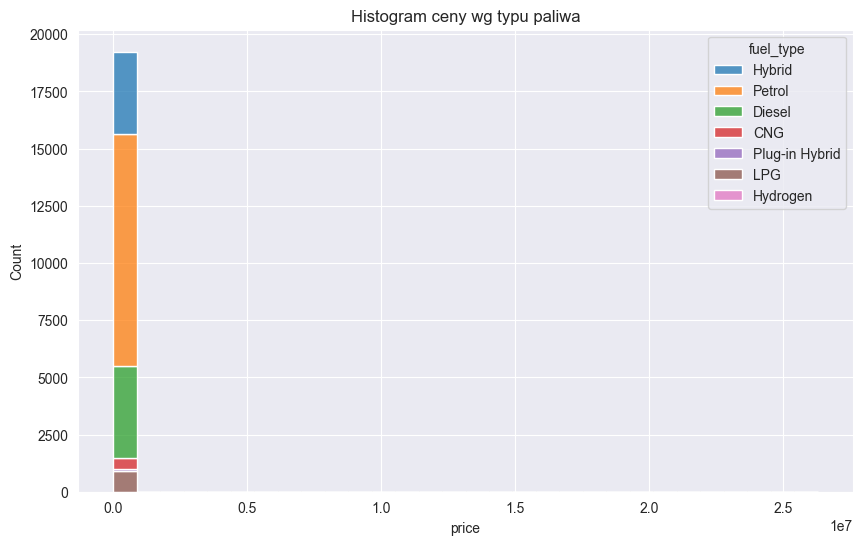

In [30]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='price', hue='fuel_type', multiple='stack', bins=30)
plt.title('Histogram ceny wg typu paliwa')
plt.show()

Wykres średnich w grupach

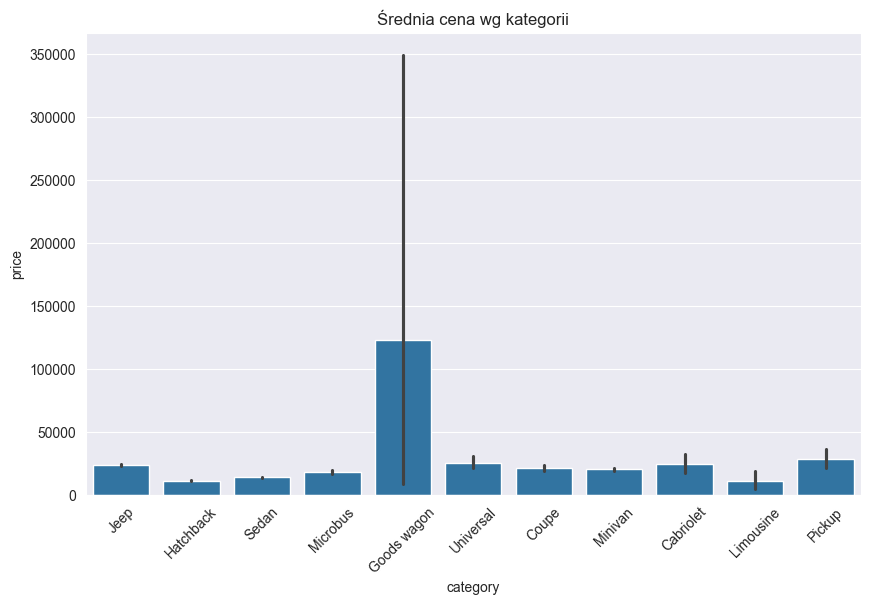

In [31]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='category', y='price', estimator='mean')
plt.xticks(rotation=45)
plt.title('Średnia cena wg kategorii')
plt.show()

Macierz korelacji

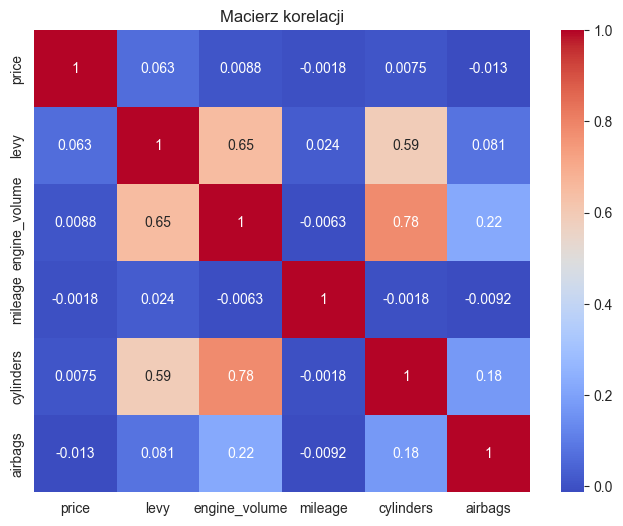

In [32]:
quantitative_cols = ['price', 'levy', 'engine_volume', 'mileage', 'cylinders', 'airbags']
corr_matrix = df[quantitative_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Macierz korelacji')
plt.show()

Test Chi^2

In [33]:
print("\nTesty Chi^2:")
for col in qualitative_cols:
    if col == 'fuel_type':
        continue
    contingency = pd.crosstab(df['fuel_type'], df[col])
    try:
        chi2, p, dof, expected = chi2_contingency(contingency)
        print(f"{col}: p-value = {p:.4f}")
    except:
        print(f"{col}: Nie można obliczyć (zbyt mało danych)")


Testy Chi^2:
manufacturer: p-value = 0.0000
model: p-value = 0.0000
category: p-value = 0.0000
gear_box_type: p-value = 0.0000
drive_wheels: p-value = 0.0000
doors: p-value = 0.0000
wheel: p-value = 0.0000
color: p-value = 0.0000


Wykresy ramka- wąsy dla zmiennych ilościowych z hipotez

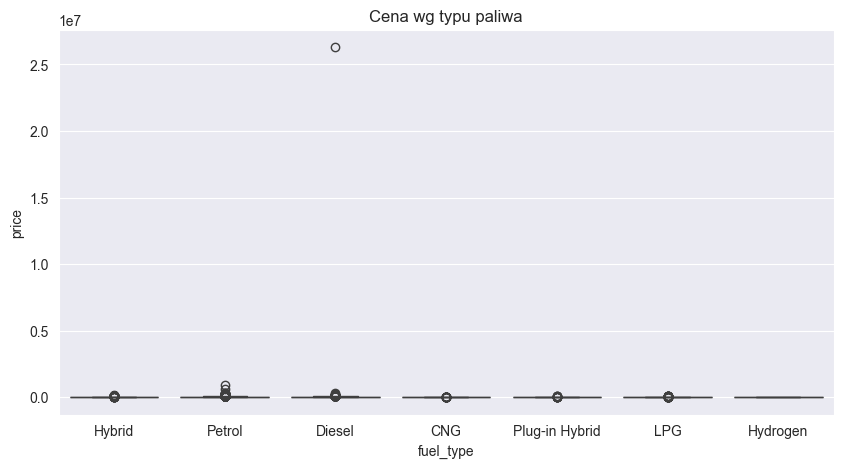

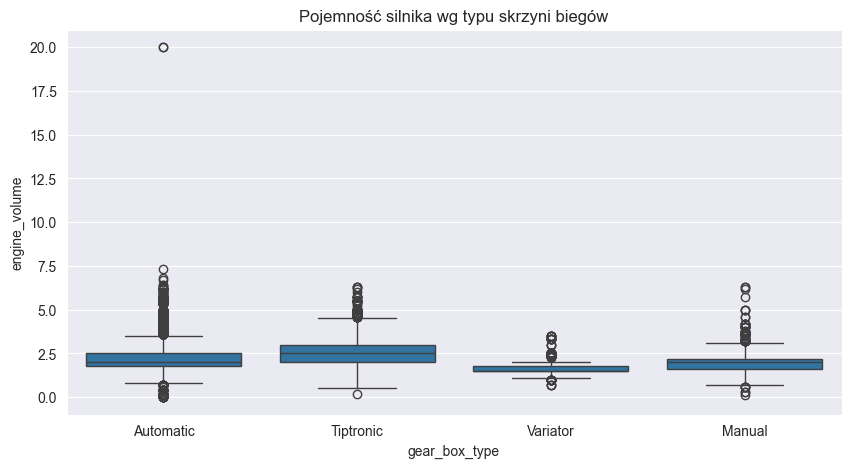

In [34]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='fuel_type', y='price')
plt.title('Cena wg typu paliwa')
plt.show()

plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='gear_box_type', y='engine_volume')
plt.title('Pojemność silnika wg typu skrzyni biegów')
plt.show()

Test normalności

In [36]:
print("\nTesty normalności:")
for col in quantitative_cols:
    stat, p = normaltest(df[col].dropna())
    print(f"{col}: p-value = {p:.4f} {'(normalne)' if p > 0.05 else '(nienormalne)'}")


Testy normalności:
price: p-value = 0.0000 (nienormalne)
levy: p-value = 0.0000 (nienormalne)
engine_volume: p-value = 0.0000 (nienormalne)
mileage: p-value = 0.0000 (nienormalne)
cylinders: p-value = 0.0000 (nienormalne)
airbags: p-value = 0.0000 (nienormalne)


Wykres rozrzutu

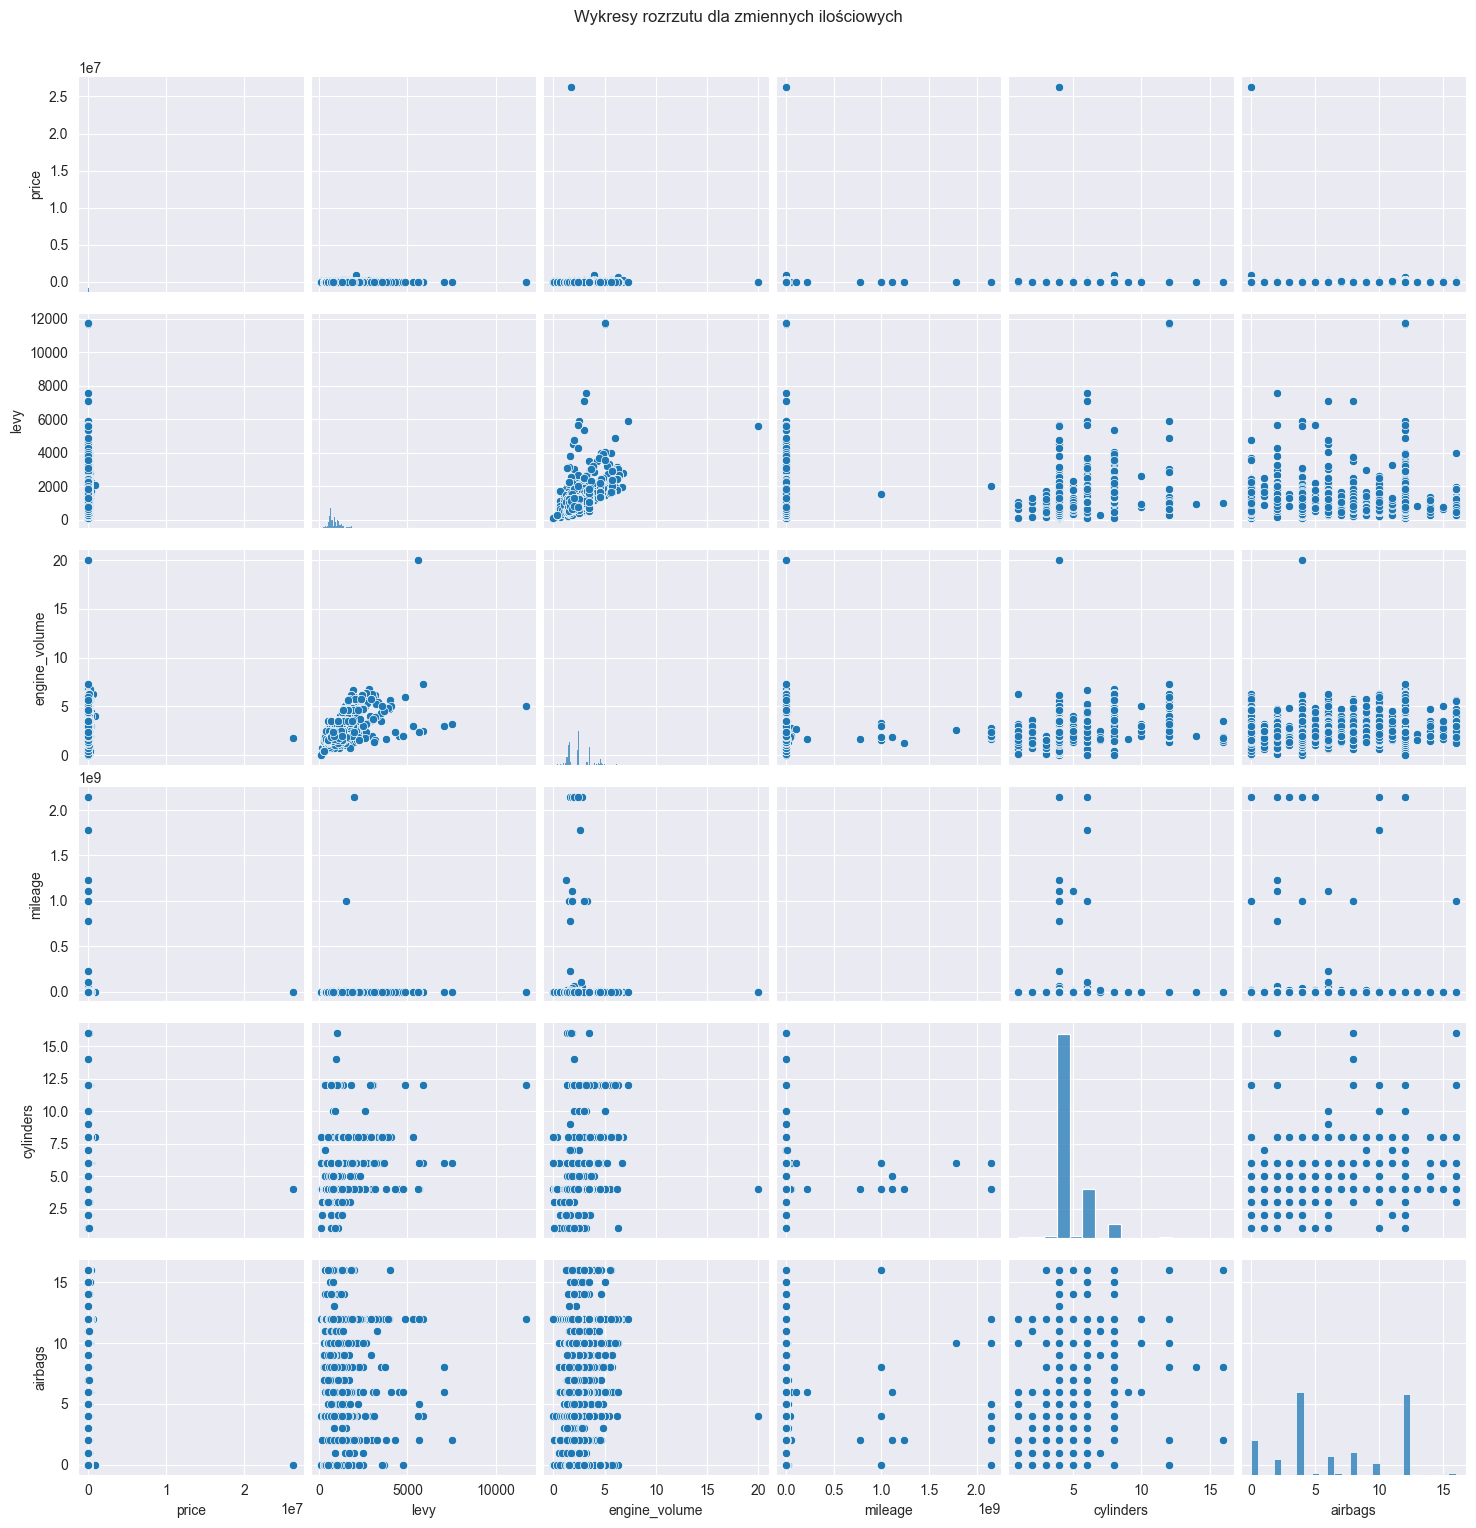

In [39]:
sns.pairplot(df[quantitative_cols])
plt.suptitle("Wykresy rozrzutu dla zmiennych ilościowych", y=1.02)
plt.show()

Skategoryzowany względem zmiennej jakościowej

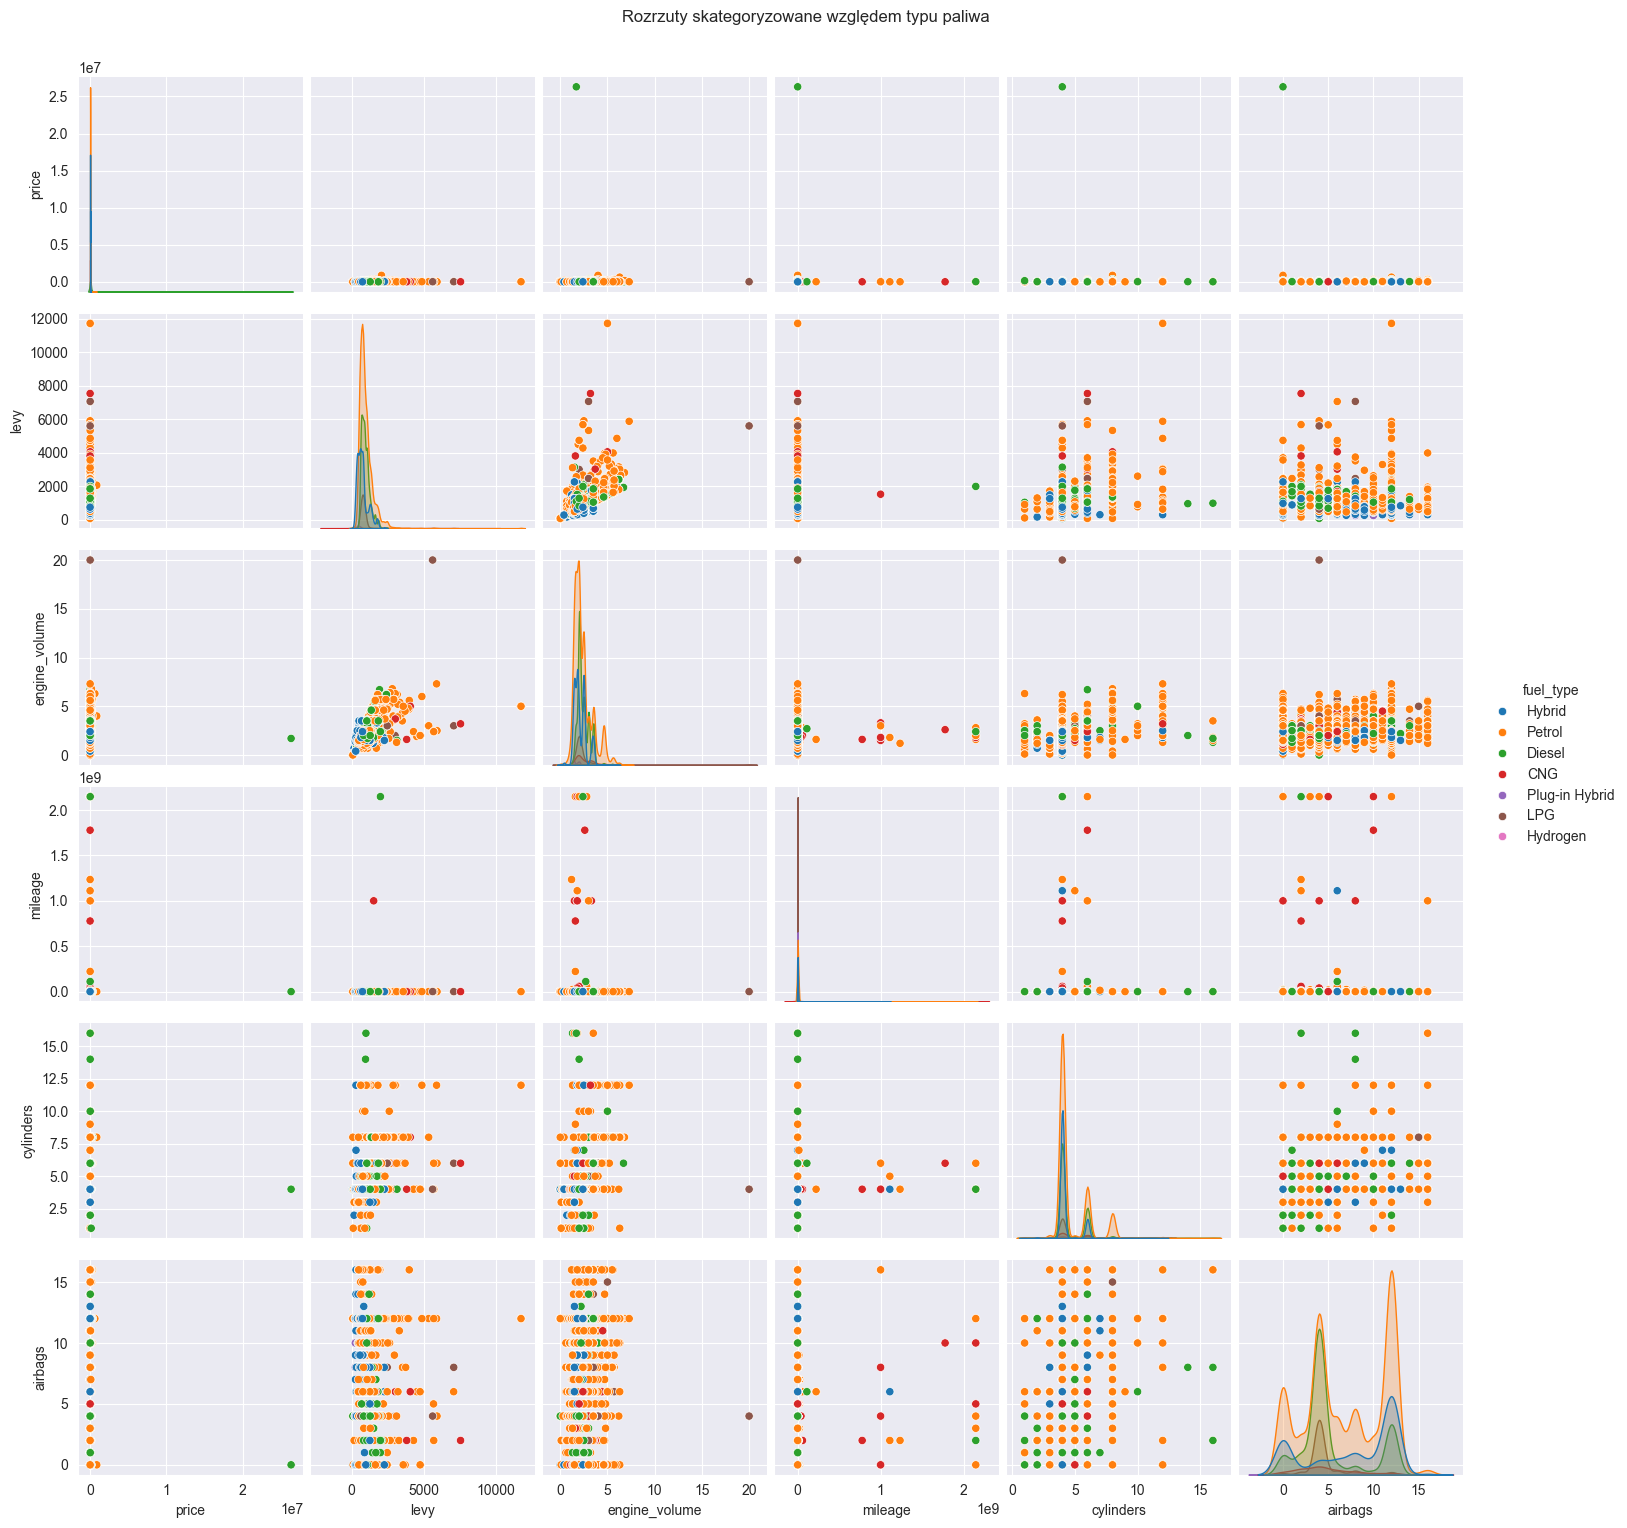

In [40]:
sns.pairplot(df[quantitative_cols + ['fuel_type']], hue='fuel_type')
plt.suptitle("Rozrzuty skategoryzowane względem typu paliwa", y=1.02)
plt.show()